***Question 1***
---


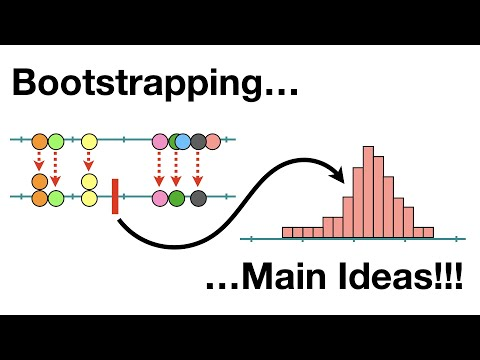

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

The standard deviation of a dataset calculates the average distance of each data point from the mean. This standard deviation only looks at one snapshot of the sample mean, and assumes the sample mean is the population mean. In general, the standard deviation calculates how spread out a dataset is. On the other hand, the standard error of the mean shows how far the sample mean is from the population mean. It helps you understand how accurate your sample mean is compared to the population mean and it is calculated by finding the standard deviation of a sample's bootstrapped means. 

***ChatGPT Chat Summary***
In this conversation, we discussed the difference between **standard deviation (SD)** and **standard error of the mean (SEM)**. SD measures the variability of individual data points, while SEM measures the uncertainty of the sample mean as an estimate of the population mean. You also asked how to calculate SEM using **bootstrapping**, which involves repeatedly resampling from the data (with replacement), calculating sample means, and determining the SEM from the standard deviation of these bootstrapped means.

You then asked how to estimate the range for a future sample mean using a bootstrapped confidence interval. Unlike the “mean ± 2 times SEM” approach, a 95% **bootstrapped confidence interval** covers exactly 95% of the bootstrapped sample means. We also discussed how **sample size (n)** affects variability—larger samples result in lower SEM—and why **bootstrapped samples must always match the original sample size** to properly reflect variability.

Lastly, we covered why **bootstrapping is done with replacement**, to introduce variability, whereas bootstrapping without replacement would fail to mimic the random variability inherent in sampling from a population.

link: https://chatgpt.com/share/66f707c7-0984-800d-9eb3-4a128bf05817


***Question 2***
---
To calculate the 95% confidence interval, we calculate the lower and upper bounds of this range through the following formulas:
lower bound = bootstrapped mean - 1.96 * Standard Error of the Mean
upper bound = bootstrapped mean + 1.96 * Standard Error of the Mean
All means which fall between the lower bound and upper bound are within the 95% confidence interval. 

***ChatGPT Chat Summary***
Here’s a summary of our chat:

- **95% Bootstrapped Confidence Interval**: This is calculated by resampling the original dataset, generating many bootstrap samples, and calculating the statistic (e.g., mean) for each. The 95% confidence interval is the range between the 2.5th and 97.5th percentiles of the bootstrap statistics.
  
- **Visual Explanation**: A plot was provided showing the distribution of bootstrap sample means and the 95% confidence interval based on the resampling method. The interval captures 95% of the bootstrapped means.

- **Standard Error of the Mean (SEM) and 95% Confidence Interval**: 
   - We calculated the sample mean, SEM, and used the normal approximation (with \(z = 1.96\)) to calculate a 95% confidence interval for the mean.
   - This confidence interval is expected to cover 95% of the bootstrapped sample means.
   - For our data, the interval was approximately (9.44, 10.15), which is close to the bootstrapped interval.

Let me know if you need more details or further explanation!

link: https://chatgpt.com/share/66f70ab9-0b00-800d-ba2e-da1ff08aa407

***Question 3***
---
Instead of using the Standard Error of the Mean to calculate the 95% certainty range, you can find the 95% of the range by looking at the range between the 2.5% quartile of the data and the 97.5% quartile of the data.  

***Question 4***
---


In [4]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# Extract the 'calories' column
calories = df['calories'].dropna()  # Drop any missing values

# Define the number of bootstrap samples and the confidence level
n_bootstrap_samples = 10000

# Create an array to hold the bootstrap medians
bootstrap_medians = np.zeros(n_bootstrap_samples)

# Perform bootstrap sampling
for i in range(n_bootstrap_samples):
    sample = np.random.choice(calories, size=len(calories), replace=True)  # Bootstrap sample
    bootstrap_medians[i] = np.median(sample)  # Calculate the median and insert it into our storage array

# Calculate the confidence interval
lower_bound = np.percentile(bootstrap_medians, 2.5)
upper_bound = np.percentile(bootstrap_medians, 97.5)

# Print the results
print(f"{confidence_level*100:.0f}% Bootstrap Confidence Interval for the Median of Calories:")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

95% Bootstrap Confidence Interval for the Median of Calories:
Lower Bound: 240.0
Upper Bound: 280.0


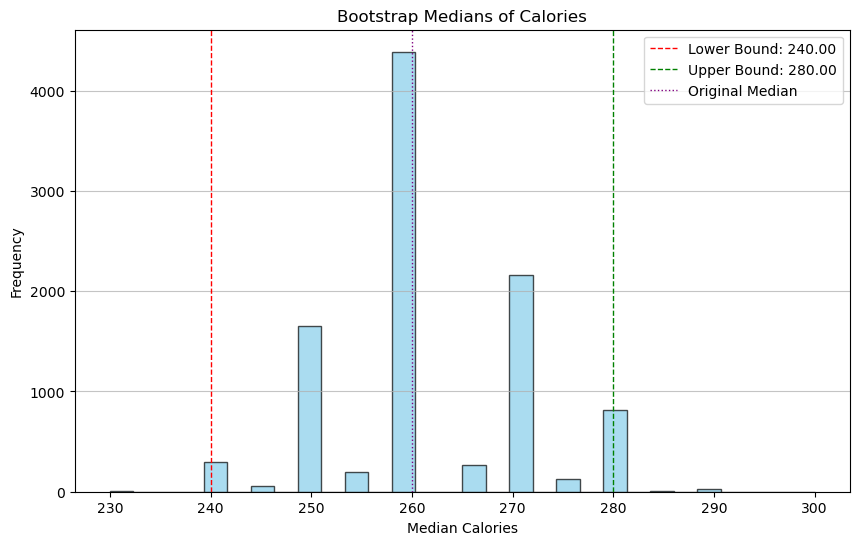

In [3]:

import matplotlib.pyplot as plt


# Graphing the results
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_medians, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=1, label=f'Lower Bound: {lower_bound:.2f}')
plt.axvline(upper_bound, color='green', linestyle='dashed', linewidth=1, label=f'Upper Bound: {upper_bound:.2f}')
plt.axvline(np.median(calories), color='purple', linestyle='dotted', linewidth=1, label='Original Median')
plt.title('Bootstrap Medians of Calories')
plt.xlabel('Median Calories')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

***ChatGPT Summary***
Sure! Here's a summary of our conversation:

1. **Bootstrap Confidence Interval**:
   - You asked how to create a bootstrap confidence interval for the median of calories using a dataset from a CSV file.
   - I provided a code example that uses `pandas` and `numpy` to perform bootstrap sampling, calculate medians, and compute the confidence interval.

2. **Histogram Visualization**:
   - You requested an extension to visualize the bootstrap medians with a histogram.
   - I updated the code to include a histogram using `matplotlib`, showing the distribution of bootstrap medians and marking the confidence interval bounds and the original median.

3. **Gaps in Histograms**:
   - You inquired about the gaps observed in the histograms.
   - I explained potential reasons for gaps, including bin choices, random sampling variation, and the nature of the underlying data distribution.
   - I suggested experimenting with the number of bins and increasing the number of bootstrap samples to mitigate the issue.

Let me know if you need further details on any part of the discussion!

link: https://chatgpt.com/share/66f71315-7a98-800d-96ac-065153053b17


***Question 5***
---
We must distinguish the population parameters from the sample statistics because the sample statistic may not be representitive of the population. The sample population is a subset of the actual population, thus the statistic information we get from the sample population is not representitive of the entirety of the actual population. We use confidence intervals to gauge the range in which our sample statistic is likely to be correct.  

***ChatGPT Chat Summary***\
In this chat, we discussed the distinction between **population parameters** and **sample statistics** in the context of confidence intervals. Population parameters are fixed values that describe characteristics of an entire population (e.g., population mean \(\mu\), population proportion \(p\)), whereas sample statistics are estimates derived from a sample that aim to represent the population. Confidence intervals use sample statistics to estimate the range where the true population parameter likely lies, accounting for sampling variability.

I also provided an overview of **population parameters**, explaining common examples such as the population mean, proportion, variance, and standard deviation.

link: https://chatgpt.com/share/66fac4b3-270c-800d-90e8-255960773d64

***Question 6***
---

1. To bootstrap a sample dataset, we pretend the sample dataset is our population dataset and take samples from the sample dataset. First, we take a sample from the sample dataset (with replacement) and then we calculate a attribute from that sample (mean, median, mode, etc) then we repeat this sampling process until we have a sufficient amount of data points. 
    
2. The purpose of bootstrapping is to estimate the amount of uncertainity in our sample compared to the population. It can make us more confident or unconfident in the accuracy of our data. 

3. To check the accuracy of our hypothesized mean, we can take our sample and use bootstrapping to construct a histogram of the sample mean. Next, we can check if our hypothesized mean lies within the 95% confidence interval in our sample mean histogram.

***ChatGPT Chat Summary***
You asked how bootstrapping could be used to assess the plausibility of a hypothesized population mean. I explained that you could:

1. Hypothesize a population mean \(\mu_0\).
2. Take a sample of size \(n\) from the population.
3. Use bootstrapping by resampling with replacement from the sample multiple times, calculating the mean for each resampled dataset.
4. Construct a confidence interval from the distribution of bootstrap sample means.
5. Check if the hypothesized mean \(\mu_0\) falls within the confidence interval. If it does, the hypothesized mean may be plausible; if not, it may be implausible.

link: https://chatgpt.com/share/66fb142f-5438-800d-8730-9e8e048b8edb

***Question 7***
---
The person in the video couldn't reject the null hypothesis because there is only a 5% chance that we are in the universe where 0 is not the mean. Moreover, to reject the null hypothesis with 95% certainty, the confidence interval must not overlap 0. 

***Question 8***
---

**Problem Introduction**

The purpose of this report is to examine the effectivieness of the new vaccine created by Alitech. The report will be using the following dataset:

| PatientID | Age | Gender | InitialHealthScore | FinalHealthScore |
|-----------|-----|--------|--------------------|------------------|
| 1         | 45  | M      | 84                 | 86               |
| 2         | 34  | F      | 78                 | 86               |
| 3         | 29  | M      | 83                 | 80               |
| 4         | 52  | F      | 81                 | 86               |
| 5         | 37  | M      | 81                 | 84               |
| 6         | 41  | F      | 80                 | 86               |
| 7         | 33  | M      | 79                 | 86               |
| 8         | 48  | F      | 85                 | 82               |
| 9         | 26  | M      | 76                 | 83               |
| 10        | 39  | F      | 83                 | 84               |


It is important to recognize that this is only a subset of data from the whole population. So attributes extrapolated from this dataset may not be representitive of the entire population. Some usefull background information on the demographics for this study are displayed below. 


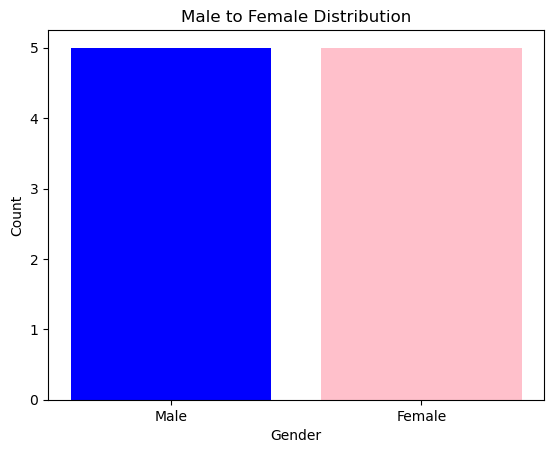

In [1]:
import matplotlib.pyplot as plt

# Data
ages = [45, 34, 29, 52, 37, 41, 33, 48, 26, 39]
genders = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F']

# Counting the number of males and females
male_count = sum(1 for gender in genders if gender == 'M')
female_count = sum(1 for gender in genders if gender == 'F')

# Bar chart data
categories = ['Male', 'Female']
counts = [male_count, female_count]

# Plotting
plt.bar(categories, counts, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Male to Female Distribution')

# Display the plot
plt.show(renderer = 'png')

Notice that the dataset has no bias towards either gender. So if the vaccine is more/less effective on a partocular gender, it will not effect our results. 

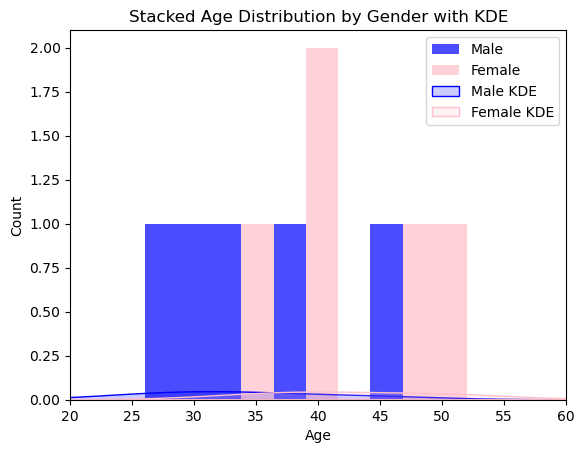

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
ages = [45, 34, 29, 52, 37, 41, 33, 48, 26, 39]
genders = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F']

# Separate ages by gender
male_ages = [age for age, gender in zip(ages, genders) if gender == 'M']
female_ages = [age for age, gender in zip(ages, genders) if gender == 'F']

# Plotting the stacked histogram
plt.hist([male_ages, female_ages], bins=10, alpha=0.7, label=['Male', 'Female'], color=['blue', 'pink'], stacked=True)

# Adding KDE plots
sns.kdeplot(male_ages, color='blue', label='Male KDE', fill=True, alpha=0.2)
sns.kdeplot(female_ages, color='pink', label='Female KDE', fill=True, alpha=0.2)

# Enlarging the x-axis range
plt.xlim(20, 60)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Stacked Age Distribution by Gender with KDE')
plt.legend(loc='upper right')

# Display the plot
plt.show()

A null hypothesis is the hypothesis that the vaccine has no effect on its patients. The null hypothesis can be supported through data analysis, if the sample mean of the drug's effect is 0. 

***Methodology***

To analayze the effectiveness of the vaccine, we will construct a new collumn of data: "Change in patient's health". This new collumn is calculated by subtracting "Final Health" from "Initial Health". 

| PatientID | Age | Gender | InitialHealthScore | FinalHealthScore | ChangeInHealth |
|-----------|-----|--------|--------------------|------------------|----------------|
| 1         | 45  | M      | 84                 | 86               | 2              |
| 2         | 34  | F      | 78                 | 86               | 8              |
| 3         | 29  | M      | 83                 | 80               | -3             |
| 4         | 52  | F      | 81                 | 86               | 5              |
| 5         | 37  | M      | 81                 | 84               | 3              |
| 6         | 41  | F      | 80                 | 86               | 6              |
| 7         | 33  | M      | 79                 | 86               | 7              |
| 8         | 48  | F      | 85                 | 82               | -3             |
| 9         | 26  | M      | 76                 | 83               | 7              |
| 10        | 39  | F      | 83                 | 84               | 1              |


The sample mean of change In health is 3.3. 

Next, we will bootstrap the ChangeInHealth dataset. We will construct a kernel density diagram containing the bootstrapped sample means. On this diagram, we will annotate the 95% confidence interval. 

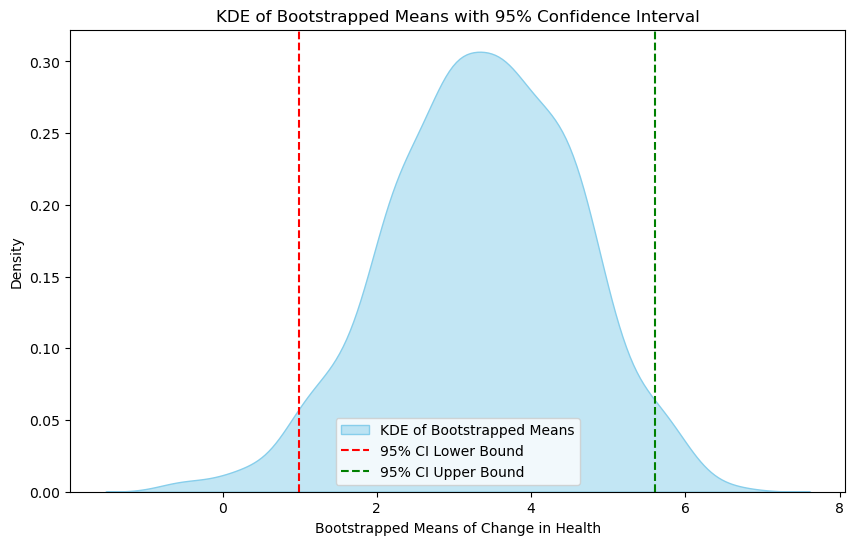

array([0.9975, 5.6025])

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Change in health scores
change_in_health = [2, 8, -3, 5, 3, 6, 7, -3, 7, 1]

# Function to perform bootstrapping
def bootstrap(data, n_bootstraps=1000):
    boot_means = []
    n = len(data)
    for _ in range(n_bootstraps):
        sample = np.random.choice(data, size=n, replace=True)
        boot_means.append(np.mean(sample))
    return boot_means

# Perform bootstrapping
bootstrapped_means = bootstrap(change_in_health)

# Calculate the 95% confidence interval
conf_interval = np.percentile(bootstrapped_means, [2.5, 97.5])

# Plotting the KDE of bootstrapped means
plt.figure(figsize=(10, 6))
sns.kdeplot(bootstrapped_means, fill=True, color='skyblue', alpha=0.5, label='KDE of Bootstrapped Means')

# Adding confidence interval
plt.axvline(conf_interval[0], color='red', linestyle='--', label='95% CI Lower Bound')
plt.axvline(conf_interval[1], color='green', linestyle='--', label='95% CI Upper Bound')

# Adding labels and title
plt.xlabel('Bootstrapped Means of Change in Health')
plt.ylabel('Density')
plt.title('KDE of Bootstrapped Means with 95% Confidence Interval')
plt.legend()

# Display the plot
plt.show()

# Display the confidence interval values
conf_interval

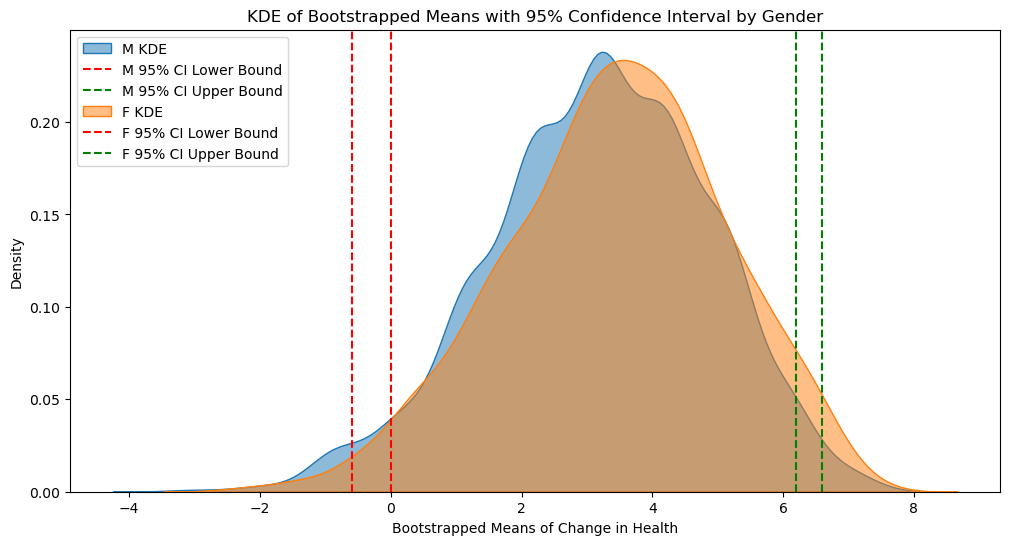

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Change in health scores and corresponding genders
data = {
    'M': [2, -3, 3, 7, 7],
    'F': [8, 5, 6, -3, 1]
}

# Function to perform bootstrapping
def bootstrap(data, n_bootstraps=1000):
    boot_means = []
    n = len(data)
    for _ in range(n_bootstraps):
        sample = np.random.choice(data, size=n, replace=True)
        boot_means.append(np.mean(sample))
    return boot_means

# Plotting bootstrapped means for each gender
plt.figure(figsize=(12, 6))

for gender, change_scores in data.items():
    # Perform bootstrapping
    bootstrapped_means = bootstrap(change_scores)

    # Calculate the 95% confidence interval
    conf_interval = np.percentile(bootstrapped_means, [2.5, 97.5])

    # Plotting the KDE of bootstrapped means
    sns.kdeplot(bootstrapped_means, fill=True, alpha=0.5, label=f'{gender} KDE')

    # Adding confidence interval lines
    plt.axvline(conf_interval[0], color='red', linestyle='--', label=f'{gender} 95% CI Lower Bound')
    plt.axvline(conf_interval[1], color='green', linestyle='--', label=f'{gender} 95% CI Upper Bound')

# Adding labels and title
plt.xlabel('Bootstrapped Means of Change in Health')
plt.ylabel('Density')
plt.title('KDE of Bootstrapped Means with 95% Confidence Interval by Gender')
plt.legend()

# Display the plot
plt.show()


***Conclusion***

From our observations, we can reject the null hypothesis with a certain amount of certainity. In all our simulations, the chance that zero was the sample mean was less than 5%. In fact, in 95% of the simulations the vaccine was effective. However, it would be interesting to further examin the dataset based on patient demographic. For example, we could look at the effectiveness of the vaccine based on gender or age. 

***ChatGPT Chat Summary***

Here's a summary of our conversation:

1. **Markdown Table Creation**: You asked for a table in Markdown format displaying patient data, including columns for Patient ID, Age, Gender, Initial Health Score, Final Health Score, and a newly added column for Change in Health.

2. **Sample Mean Calculation**: You requested the sample mean of the Change in Health column, which was calculated to be 3.3.

3. **Histogram Visualization**: You wanted to create a histogram to display the age distribution of both genders, first as a regular histogram and then as a stacked histogram. We adjusted the x-axis size and increased the number of bins in the histogram.

4. **Kernel Density Estimate (KDE)**: You requested a KDE plot for the bootstrapped means of the Change in Health column and the addition of a 95% confidence interval. I provided a code snippet for creating this visualization.

5. **Separate KDEs by Gender**: Finally, you asked for separate KDE plots for each gender's bootstrapped means, including the 95% confidence intervals. I provided an updated code snippet to accomplish this.

Let me know if you need any more details or further assistance!

https://chatgpt.com/share/66fb274c-02e0-800d-bf42-5d542a50c144